# [Clustering blender for House price problem](https://www.kaggle.com/seriousran/clustering-blender-for-house-price-problem)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

# for hierarchical clusterization
from scipy.cluster.hierarchy import dendrogram, linkage  
from scipy.spatial.distance import  pdist
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# system
from datetime import datetime
import os
sns.set()

In [2]:
s1 = pd.read_csv('./stacking(percep,rf,xgb,lgb,svr).csv')['price']
s2 = pd.read_csv('./stacking(percep,rf,xgb,lgb,svr)-semi_final.csv')['price']
s3 = pd.read_csv('./stacking(percep,rf,xgb,lgb, svr, extra).csv')['price']
s4 = pd.read_csv('./stacking(percep,rf,xgb,lgb, svr).csv')['price']
s5 = pd.read_csv('./stacking(ridge,percep,rf,xgb,lgb, svr, extra_ran).csv')['price']

submission = pd.read_csv('./sample_submission.csv')

solutions_set = pd.DataFrame({'s1':s1, 's2':s2, 's3':s3, 's4':s4, 's5':s5})

In [3]:
# scaling
scaler = MinMaxScaler()
solutions_set_scaled = scaler.fit_transform(solutions_set)
solutions_set_scaled = pd.DataFrame(solutions_set_scaled, columns=solutions_set.columns)

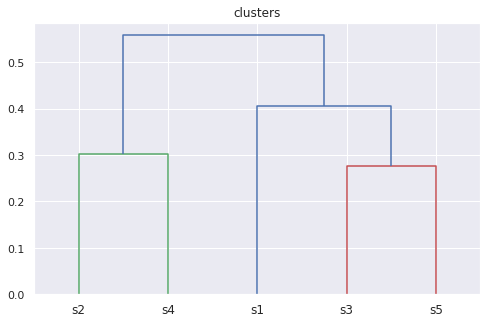

In [4]:
# transform and convert solutions set to numpy
np_solutions_set = solutions_set_scaled.T.values
# calculate the distances
solutions_set_dist = pdist(np_solutions_set)
# hierarchical clusterization
linked = linkage(solutions_set_dist, 'ward')

# dendrogram
fig = plt.figure(figsize=(8,5))
dendrogram(linked, labels=solutions_set_scaled.columns)
plt.title('clusters')
plt.show()

Text(0.5, 1.0, 'Submissions of s1 and s2')

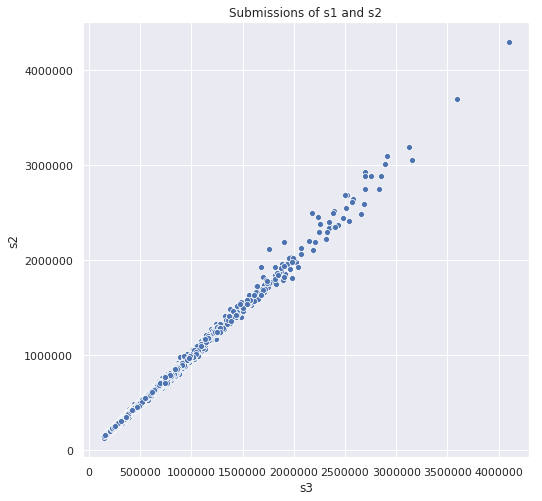

In [6]:
fig = plt.figure(figsize=(8,8))
sns.scatterplot(x='s3', y='s2', data=solutions_set)
plt.title('Submissions of s1 and s2')

In [7]:
# get scaled submissions s1, s2, s3, s4, s5
for s in solutions_set_scaled.columns:
    s = solutions_set_scaled[s]
    print(s)

0       0.101104
1       0.084293
2       0.329459
3       0.043227
4       0.047600
5       0.041978
6       0.072310
7       0.142635
8       0.033809
9       0.057941
10      0.133975
11      0.020305
12      0.095266
13      0.103246
14      0.178063
15      0.019074
16      0.070878
17      0.088234
18      0.239896
19      0.069939
20      0.090930
21      0.108250
22      0.227552
23      0.055299
24      0.075350
25      0.074946
26      0.055469
27      0.113690
28      0.035656
29      0.111887
          ...   
6438    0.086205
6439    0.347586
6440    0.512374
6441    0.055603
6442    0.469547
6443    0.090983
6444    0.282770
6445    0.319265
6446    0.110667
6447    0.111128
6448    0.042565
6449    0.105490
6450    0.026398
6451    0.112005
6452    0.122306
6453    0.147989
6454    0.054367
6455    0.038900
6456    0.586848
6457    0.121079
6458    0.056239
6459    0.070256
6460    0.096485
6461    0.103357
6462    0.082408
6463    0.028984
6464    0.070932
6465    0.0817

In [8]:
cluster1 = (1/3) * (s1 + s2 + s4)
cluster2 = (1/2) * (s3 + s5)

submission['price'] = 0.1*cluster1 + 0.9*cluster2

In [9]:
submission.to_csv('submission1.csv', index=False)